<a href="https://colab.research.google.com/github/mkayanda/Personal_Projects/blob/master/NLP_UNGeneralDebate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UN General Debate Dataset

The corpus consists of 7,507 speeches held at the annual sessions of the United Nations General Assembly from 1970 to 2016. It was created in 2017 by Mikhaylov, Baturo, and Dasandi at Harvard “for understanding and measuring state preferences in world politics.” Each of the almost 200 countries in the United Nations has the opportunity to present its views on global topics such international conflicts, terrorism, or climate change at the annual General Debate.

In [2]:
import sys, os
ON_COLAB = 'google.colab' in sys.modules

if ON_COLAB:
    GIT_ROOT = 'https://github.com/blueprints-for-text-analytics-python/blueprints-text/raw/master'
    os.system(f'wget {GIT_ROOT}/ch01/setup.py')

%run -i setup.py

You are working on Google Colab.
Files will be downloaded to "/content".
!wget -P /content https://github.com/blueprints-for-text-analytics-python/blueprints-text/raw/master/settings.py
!wget -P /content/data/un-general-debates https://github.com/blueprints-for-text-analytics-python/blueprints-text/raw/master/data/un-general-debates/un-general-debates-blueprint.csv.gz
!wget -P /content/ch01 https://github.com/blueprints-for-text-analytics-python/blueprints-text/raw/master/ch01/requirements.txt

Additional setup ...
!pip install -r ch01/requirements.txt


In [3]:
%run "$BASE_DIR/settings.py"

%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'png'

In [4]:
pd.options.display.max_colwidth = 150 ###
file = "un-general-debates-blueprint.csv"
file = f"{BASE_DIR}/data/un-general-debates/un-general-debates-blueprint.csv.gz" ### real location
df = pd.read_csv(file)
df.sample(2, random_state=53)

,session,year,country,country_name,speaker,position,text
3871,51,1996,PER,Peru,Francisco Tudela Van Breughel Douglas,Minister for Foreign Affairs,"﻿At the outset, allow me,\nSir, to convey to you and to this Assembly the greetings\nand congratulations of the Peruvian people, as well as\ntheir..."
4697,56,2001,GBR,United Kingdom,Jack Straw,Minister for Foreign Affairs,"﻿Please allow me\nwarmly to congratulate you, Sir, on your assumption of\nthe presidency of the fifty-sixth session of the General\nAssembly.\nThi..."


In [5]:
df.dtypes

session          int64
year             int64
country         object
country_name    object
speaker         object
position        object
text            object
dtype: object

In [6]:
df['length'] = df['text'].str.len()

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
session,7507.00,49.61,12.89,25.00,39.00,51.00,61.00,70.00
year,7507.00,1994.61,12.89,1970.00,1984.00,1996.00,2006.00,2015.00
length,7507.00,17967.28,7860.04,2362.00,12077.00,16424.00,22479.50,72041.00


In [8]:
df[['country', 'speaker']].describe(include='O').T

,count,unique,top,freq
country,7507,199,DZA,46
speaker,7480,5428,Seyoum Mesfin,12


In [9]:
df.isna().sum()

session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
length             0
dtype: int64

In [10]:
df['speaker'].fillna('unknown', inplace=True)

In [11]:
df[df['speaker'].str.contains('Bush')]['speaker'].value_counts()

George W. Bush        4
Mr. George W. Bush    2
Bush                  1
Mr. George W Bush     1
George Bush           1
Name: speaker, dtype: int64

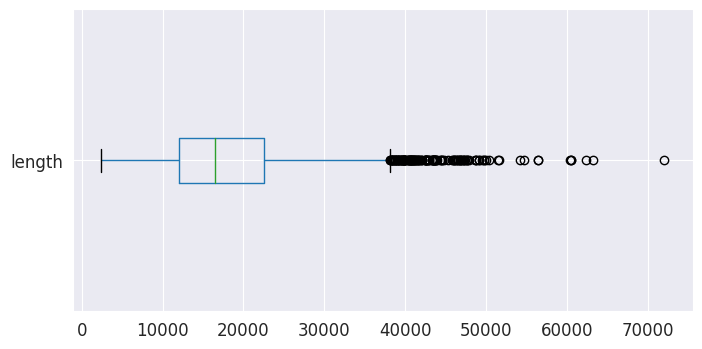

In [12]:
df['length'].plot(kind='box', vert=False)

 50% percent of the speeches (the box in the middle) have a length between roughly 12,000 and 22,000 characters, with the median at about 16,000 and a long tail with many outliers to the right. The distribution is obviously left-skewed. We can get some more details by plotting a histogram

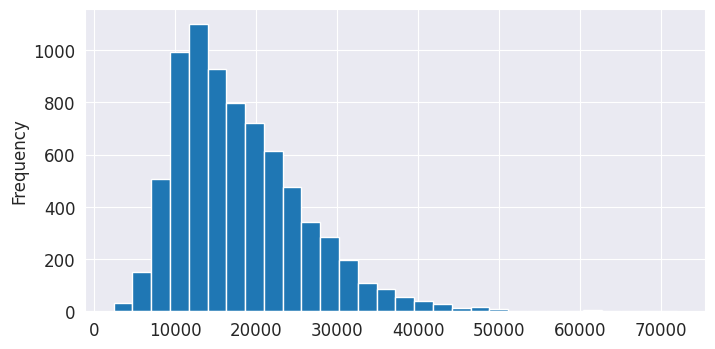

In [13]:
df.length.plot(kind='hist', bins=30)

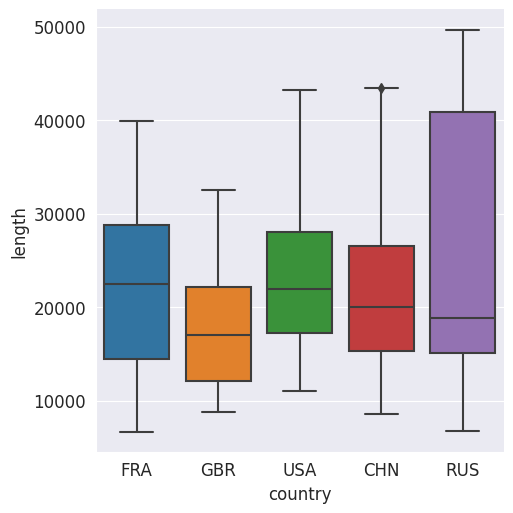

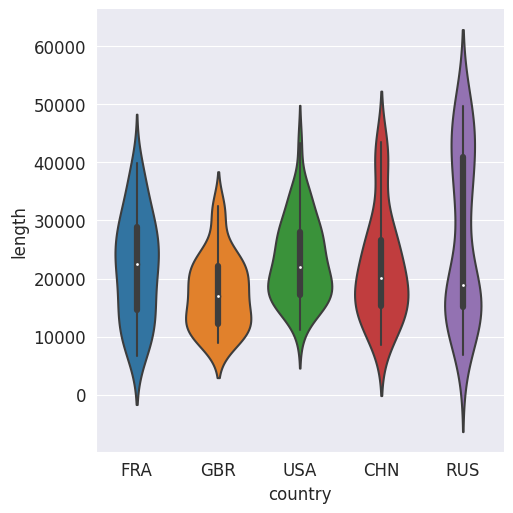

In [14]:
where = df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS'])
sns.catplot(data=df[where], x="country", y="length", kind='box')
sns.catplot(data=df[where], x="country", y="length", kind='violin')

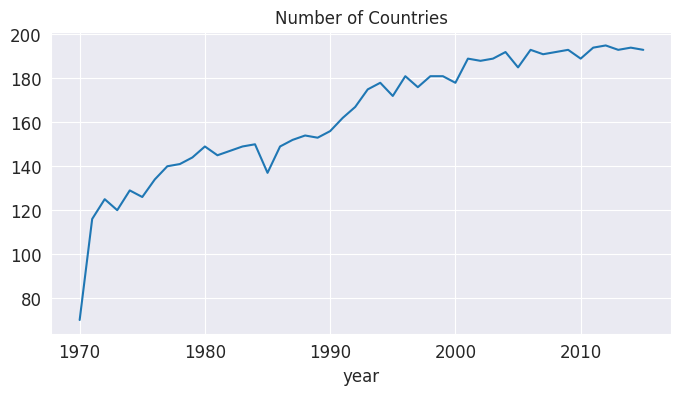

In [15]:
df.groupby('year').size().plot(title="Number of Countries")

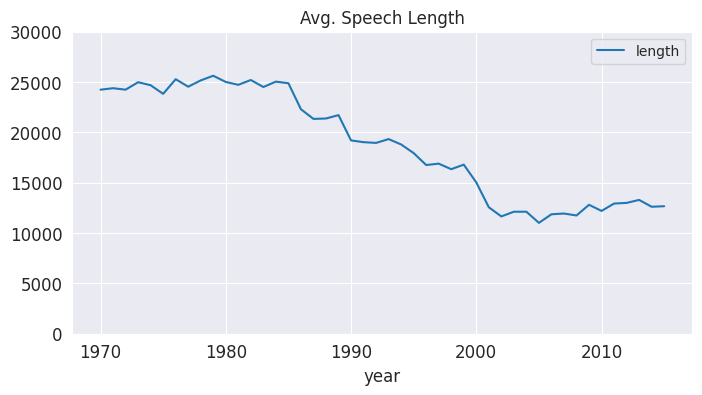

In [16]:
df.groupby('year').agg({'length': 'mean'}) \
  .plot(title="Avg. Speech Length", ylim=(0,30000))

In [ ]:
## Blueprint: Building a Simple Text Preprocessing Pipeline¶


In [18]:
import regex as re

def tokenize(text):
  return re.findall(r'[\w-]*\p{L}[\w-]*', text)

In [19]:
# trying out the function

text = "Let's defeat SARS-CoV-2 together in 2020!"
tokens = tokenize(text)
print("|".join(tokens))

Let|s|defeat|SARS-CoV-2|together|in


In [ ]:
# Treating stop words

